# Machine learning experiment 1-2 -- Linear Classifier

In [1]:
# setup code

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

# Data Loading and Preprocessing

In [2]:
# Load the raw australian_scale data.
filename = 'dataset/australian_scale'
X, y = load_svmlight_file(filename)
X = X.toarray()

# Split the data into train and valuation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)

Train data shape:  (552, 14)
Train labels shape:  (552,)
Validation data shape:  (138, 14)
Validation labels shape:  (138,)


In [3]:
# preprocessing: substract the mean of each feature
# first: compute the mean of the features of train data

_mean = np.mean(X_train, axis = 0)
print(_mean)

[ 0.31884058 -0.46476572 -0.67008152 -0.24637681 -0.01672242 -0.07382246
 -0.84769386  0.04710145 -0.16666667 -0.92953713 -0.05797101 -0.07971014
 -0.81589312 -0.97806283]


In [4]:
# second: subtract the mean from train and X_val data

X_train -= _mean
X_val -= _mean

In [5]:
# third: append the bias dimension of ones

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])

print('Train data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)

Train data shape:  (552, 15)
Validation data shape:  (138, 15)


In [6]:
# 

y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

print('Train labels shape: ', y_train.shape)
print('Validation labels shape: ', y_val.shape)

Train labels shape:  (552, 1)
Validation labels shape:  (138, 1)


# Linear Classifier

svm_loss_naive(w, X_train, y_train, reg) return loss, grad

svm_loss_vectorized(w, X_train, y_train, reg) return loss, grad



In [7]:
def svm_loss_naive(W, X, y, reg):
    '''
    svm loss function, naive implementation (with loops).
    
    Inputs:
    - W: A numpy array of shape (D, 1) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N, 1) containing training labels.
    - reg: (float) regularization strength
    
    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    '''
    num_train = X.shape[0]
    
    loss = 0.0
    grad = np.zeros(W.shape) # initialize the gradient as zero
    
    # compute the loss and the gradient
    for i in range(num_train):
        _y = X[i:i+1].dot(W)[0][0]
        if 1 - y[i][0] * _y > 0:
            loss += 1 - y[i][0] * _y
            # grad += - (X[i] * y[i]).reshape(-1, 1)
            grad += - X[i:i+1].T.dot(y[i:i+1])
            
    loss /= num_train
    grad /= num_train
    
    # Add regularization to the loss and gradient.
    loss += reg * 0.5 * np.sum(np.square(W))
    grad += reg * W
    
    return loss, grad

def svm_loss_vectorized(W, X, y, reg):
    '''
    svm loss function, vectorized implementation.
    
    Inputs and outputs are the same as regresser_loss_naive.
    '''
    _y = X.dot(W) # (N, 1)
    loss = np.mean(np.maximum(0, 1 - y * _y)) + reg * 0.5 * np.sum(np.square(W))
    
    coeff_mat = - X * y
    coeff_mat[(1 - y * _y == 0).reshape(-1)] = 0
    grad = np.mean(coeff_mat, axis = 0).reshape(-1,1) + reg * W
    
    return loss, grad

def predict(W, X):
    _y = X.dot(W)
    p = np.array(_y>0, dtype = np.float64)
    p[p == 0] = -1
    return p

# Gradient Check

Performing a gradient check is as simple as comparing the analytic gradient to the numerical gradient. 


In [8]:
def eval_numerical_gradient(f, x, analytic_grad, h=1e-5):
    """
    Evaluate a numeric gradient for a function that accepts a numpy
    array and returns a numpy array.
    """
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        
        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x)
        x[ix] = oldval - h
        neg = f(x)
        x[ix] = oldval
        
        grad_numerical = (pos - neg) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
        print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))
        
        it.iternext()

In [9]:
W = np.zeros((X_train.shape[1], 1))

# do the gradient check with regularization turned off
print('gradient check with regularization turned off')
loss, grad = svm_loss_naive(W, X_train, y_train, 0.0)
f = lambda w: svm_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = eval_numerical_gradient(f, W, grad)

# do the gradient check once again with regularization turned on
print('\ngradient check with regularization turned on')
loss, grad = svm_loss_naive(W, X_train, y_train, 0.5)
f = lambda w: svm_loss_naive(w, X_train, y_train, 0.5)[0]
grad_numerical = eval_numerical_gradient(f, W, grad)

gradient check with regularization turned off
numerical: 0.023472 analytic: 0.023472, relative error: 4.772547e-09
numerical: -0.057881 analytic: -0.057881, relative error: 4.056767e-10
numerical: -0.077897 analytic: -0.077897, relative error: 1.522477e-10
numerical: -0.075614 analytic: -0.075614, relative error: 2.163692e-10
numerical: -0.202850 analytic: -0.202850, relative error: 1.047663e-10
numerical: -0.115721 analytic: -0.115721, relative error: 4.283243e-11
numerical: -0.069076 analytic: -0.069076, relative error: 3.527363e-10
numerical: -0.694037 analytic: -0.694037, relative error: 1.785912e-10
numerical: -0.469203 analytic: -0.469203, relative error: 8.262734e-11
numerical: -0.059853 analytic: -0.059853, relative error: 3.239318e-09
numerical: -0.040170 analytic: -0.040170, relative error: 5.640039e-10
numerical: -0.030325 analytic: -0.030325, relative error: 1.096969e-09
numerical: 0.023116 analytic: 0.023116, relative error: 2.518041e-09
numerical: -0.019964 analytic: -0.0

# Performance Comparison

compare the performance of the naive implementation and vetorized implementation of gradient computing.



In [10]:
import time

tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_train, y_train, 0.5)
toc = time.time()
print('Naive implementation computed in %fs' % (toc - tic))


tic = time.time()
loss_vectorized, grad_vectorized = svm_loss_vectorized(W, X_train, y_train, 0.5)
toc = time.time()
print('Vectorized implementation computed in %fs' % (toc - tic))


print('difference of loss: %f' % (loss_naive - loss_vectorized))
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference of gradient: %f' % difference)

Naive implementation computed in 0.003361s
Vectorized implementation computed in 0.000326s
difference of loss: 0.000000
difference of gradient: 0.000000


# Gradient Descent

In [15]:
#
# reg: regularization strength.
# lr: learning rate for optimization.
# num_iters: number of steps to take when optimizing
reg = 2
lr = 0.001
num_iters=1500

print('lr: %f, reg: %f, num_iters: %f' % (lr, reg, num_iters))
W = np.random.random((X_train.shape[1], 1))
loss_train_history = []
loss_val_history = []
accuracy_train_history = []
accuracy_val_history = []
for i in range(num_iters):
    loss_train, grad = svm_loss_vectorized(W, X_train, y_train, reg)
    loss_val, _ = svm_loss_vectorized(W, X_val, y_val, reg)
    W -= lr * grad
    
    p_train = predict(W, X_train)
    p_val = predict(W, X_val)
    accuracy_train = np.mean(np.array(p_train == y_train), dtype = np.float32)
    accuracy_val = np.mean(np.array(p_val == y_val), dtype = np.float32)

    loss_train_history.append(loss_train)
    loss_val_history.append(loss_val)
    accuracy_train_history.append(accuracy_train)
    accuracy_val_history.append(accuracy_val)
    if i % 100 == 0:
        print('iteration %d / %d: train loss: %f\tvaluation loss: %f' 
              % (i, num_iters, loss_train, loss_val))

lr: 0.001000, reg: 2.000000, num_iters: 1500.000000
iteration 0 / 1500: train loss: 5.010897	valuation loss: 4.975632
iteration 100 / 1500: train loss: 3.671039	valuation loss: 3.638663
iteration 200 / 1500: train loss: 2.755736	valuation loss: 2.724184
iteration 300 / 1500: train loss: 2.128769	valuation loss: 2.099030
iteration 400 / 1500: train loss: 1.698657	valuation loss: 1.672965
iteration 500 / 1500: train loss: 1.405897	valuation loss: 1.383995
iteration 600 / 1500: train loss: 1.205997	valuation loss: 1.187599
iteration 700 / 1500: train loss: 1.070460	valuation loss: 1.053503
iteration 800 / 1500: train loss: 0.978517	valuation loss: 0.961700
iteration 900 / 1500: train loss: 0.916728	valuation loss: 0.898990
iteration 1000 / 1500: train loss: 0.876371	valuation loss: 0.858619
iteration 1100 / 1500: train loss: 0.849800	valuation loss: 0.833141
iteration 1200 / 1500: train loss: 0.832531	valuation loss: 0.816061
iteration 1300 / 1500: train loss: 0.821486	valuation loss: 0.8

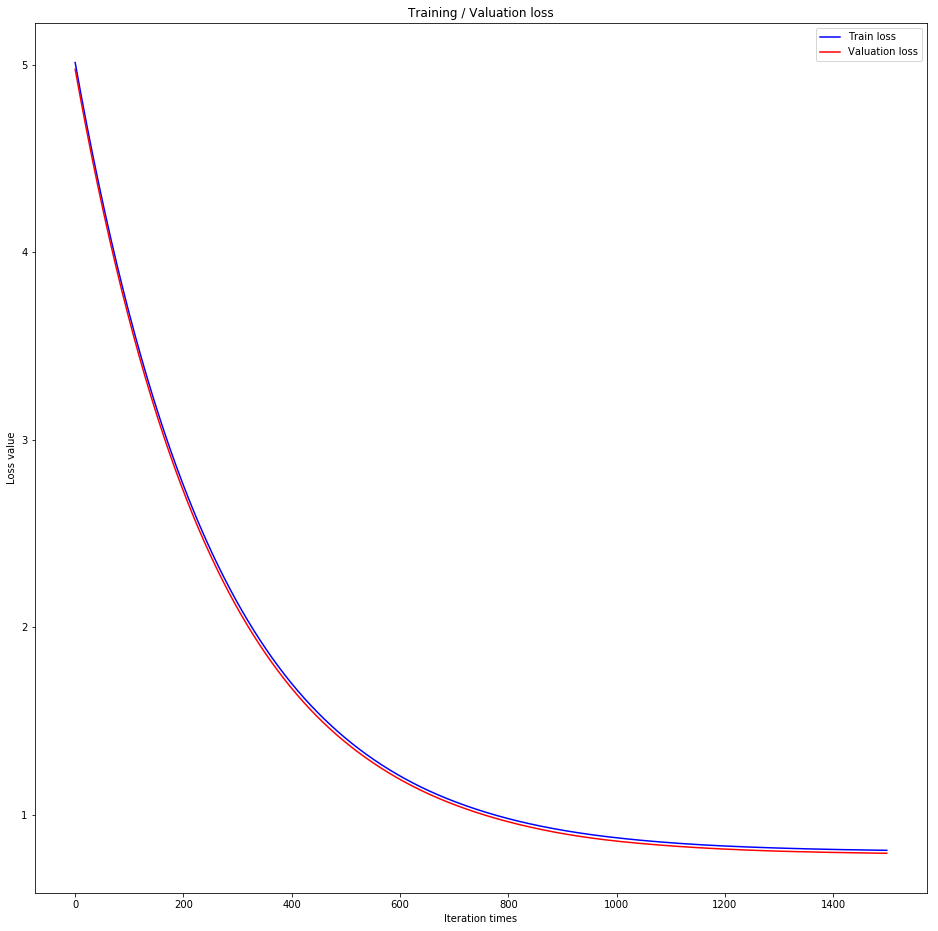

In [16]:
# plot the loss and accuracy as a function of iteration number:

plt.title('Training / Valuation loss')
plt.plot(loss_train_history,'blue',label='Train loss')
plt.plot(loss_val_history,'red',label='Valuation loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()

plt.show()

In [13]:
p = predict(W, X_train)
accuracy_train = np.mean(np.array(p == y_train), dtype = np.float32)
p = predict(W, X_val)
accuracy_val = np.mean(np.array(p == y_val), dtype = np.float32)

print('train accuracy:', accuracy_train)
print('valuation accuracy:', accuracy_val)

train accuracy: 0.855072
valuation accuracy: 0.934783
